# Lab 4

## Load and Setup Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.array_algos import replace
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline 

In [2]:
labeled_df = pd.read_csv('lab2_labeled.csv')

In [3]:
labeled_df.head()

,Unnamed: 0,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2_clusters,labels_3_clusters,labels_4_clusters
0,0,39.0,2062.0,588.0,1933.0,570.0,1.3801,97000.0,1,1,1
1,1,35.0,1852.0,358.0,1414.0,347.0,4.2750,173600.0,1,0,0
2,2,9.0,2486.0,626.0,1938.0,525.0,2.1293,151400.0,1,1,0
3,3,20.0,37.0,11.0,34.0,8.0,1.2000,50000.0,1,1,1
4,4,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0,0,2,3


In [4]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          300 non-null    int64  
 1   housing_median_age  300 non-null    float64
 2   total_rooms         300 non-null    float64
 3   total_bedrooms      300 non-null    float64
 4   population          300 non-null    float64
 5   households          300 non-null    float64
 6   median_income       300 non-null    float64
 7   median_house_value  300 non-null    float64
 8   labels_2_clusters   300 non-null    int64  
 9   labels_3_clusters   300 non-null    int64  
 10  labels_4_clusters   300 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.9 KB


In [5]:
labeled_df.columns

Index(['Unnamed: 0', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'labels_2_clusters', 'labels_3_clusters', 'labels_4_clusters'],
      dtype='object')

In [6]:
labeled_df.drop(['Unnamed: 0','labels_2_clusters','labels_3_clusters'],axis=1, inplace=True)

In [7]:
labeled_df['labels_4_clusters'].value_counts()

labels_4_clusters
1    119
0    114
2     44
3     23
Name: count, dtype: int64

In [8]:
labeled_df.rename(columns={'labels_4_clusters': 'label'}, inplace=True)

In [9]:
labeled_df = labeled_df[labeled_df['label'] <= 1]

In [10]:
labeled_df['label'].value_counts()

label
1    119
0    114
Name: count, dtype: int64

In [11]:
labeled_df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'label'],
      dtype='object')

In [12]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  233 non-null    float64
 1   total_rooms         233 non-null    float64
 2   total_bedrooms      233 non-null    float64
 3   population          233 non-null    float64
 4   households          233 non-null    float64
 5   median_income       233 non-null    float64
 6   median_house_value  233 non-null    float64
 7   label               233 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


In [13]:
columns_to_scale = labeled_df.columns.to_list()
columns_to_scale.pop()

'label'

In [14]:
columns_to_scale

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [15]:
scaler = StandardScaler()

In [16]:
labeled_df_scaled = labeled_df.copy()
labeled_df_scaled[columns_to_scale] = scaler.fit_transform(labeled_df[columns_to_scale])

In [18]:
labeled_df_scaled.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
0,0.988640,-0.239562,0.034020,0.397208,0.099454,-1.567292,-0.988840,1
1,0.641723,-0.333615,-0.466288,-0.100824,-0.439731,0.994374,0.487686,0
2,-1.613241,-0.049664,0.116679,0.402006,-0.009350,-0.904333,0.059763,0
3,-0.659218,-1.146503,-1.221101,-1.425070,-1.259390,-1.726661,-1.894802,1
5,-0.312300,-0.029062,-0.037764,0.043116,-0.052872,-0.721515,-1.077508,1


## Logistic Regression Models

In [19]:
X_Train, X_Test, y_Train, y_Test = train_test_split(labeled_df_scaled.drop('label', axis=1), labeled_df_scaled['label'], test_size=0.2, random_state=42)

In [20]:
logmodel = LogisticRegression(multi_class='multinomial', random_state=42, solver='lbfgs')
logmodel.fit(X_Train, y_Train)

/Users/takosaga/anaconda3/envs/labs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [21]:
print('Logistic regression models coefficients of intercepts: ', logmodel.intercept_)

Logistic regression models coefficients of intercepts:  [0.11235856]


In [22]:
print('Logistic regression models coefficients: ', logmodel.coef_)

Logistic regression models coefficients:  [[ 0.16579804  0.36346603  0.06846491 -0.2998187   0.09795105 -0.03711581
  -2.87278918]]


In [23]:
predicts_test = logmodel.predict(X_Test)
confusion_matrix(y_Test, predicts_test)

array([[28,  1],
       [ 0, 18]])

In [24]:
print(classification_report(y_Test, predicts_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.97        18

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



## Discriminant Analysis

In [26]:
X_Train_array = np.array(X_Train.values)
X_Test_array = np.array(X_Test.values)
y_Train_array = np.array(y_Train.values)
y_Test_array = np.array(y_Test.values)

In [27]:
lda = LDA(n_components=1, solver='svd', store_covariance=True)

In [29]:
Xlda=lda.fit(X_Train_array, y_Train_array)

In [30]:
Xlda.classes_

array([0, 1])

In [31]:
Xlda.n_features_in_

7

In [32]:
Xlda.explained_variance_ratio_

array([1.])

In [33]:
Xlda.n_components

1

In [34]:
Xlda.scalings_

array([[ 0.26020819],
       [ 0.32646362],
       [ 0.32165088],
       [-0.30899423],
       [-0.18072731],
       [ 0.14338314],
       [-1.95653809]])

In [35]:
X_Train_array_t = lda.fit_transform(X_Train_array, y_Train_array)
X_Test_array_t = lda.transform(X_Test_array)

In [36]:
print(X_Train_array_t.shape, Xlda.scalings_.shape)

(186, 1) (7, 1)


In [37]:
X_Train_array_t

array([[-2.42145335],
       [ 3.16143132],
       [ 2.36446125],
       [ 0.72891234],
       [-0.92406457],
       [-1.56521924],
       [ 2.93770354],
       [ 1.99826087],
       [ 2.32079546],
       [-2.31548238],
       [-2.76925405],
       [ 1.45437572],
       [ 1.88333377],
       [ 2.39665703],
       [ 0.07051504],
       [ 0.72640571],
       [-3.79029227],
       [ 0.66720297],
       [ 0.65358066],
       [-2.39258755],
       [-2.6576224 ],
       [ 1.21516336],
       [-0.63301232],
       [-0.64031073],
       [-0.04656502],
       [ 1.32514428],
       [ 1.28305935],
       [ 1.745269  ],
       [ 1.82070947],
       [-2.1802751 ],
       [ 1.46718938],
       [ 2.89031753],
       [ 0.38976628],
       [ 0.04909241],
       [-3.24766996],
       [ 1.22530478],
       [ 1.69074088],
       [ 3.83280717],
       [ 1.36160459],
       [-0.08114989],
       [ 2.29753789],
       [ 1.7627201 ],
       [-3.84123734],
       [ 0.56281836],
       [-2.14328094],
       [-0

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_18526/3614048329.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', shadow=False, scatterpoints=1)


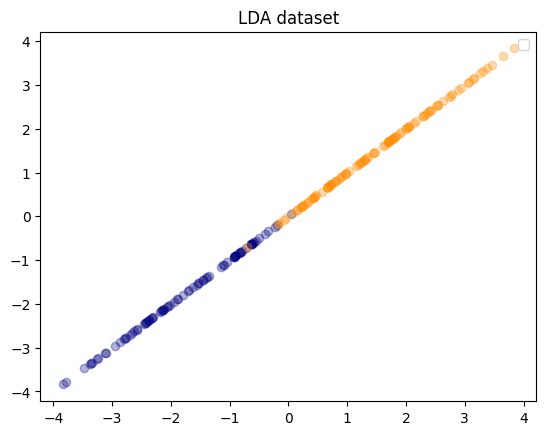

In [40]:
plt.figure()
colors = ['navy','darkorange']
for color, i in zip(colors, [0,1]):
    plt.scatter(X_Train_array_t[y_Train_array==i,0], X_Train_array_t[y_Train_array==i,0],alpha=0.3, color=color)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA dataset')
plt.show()

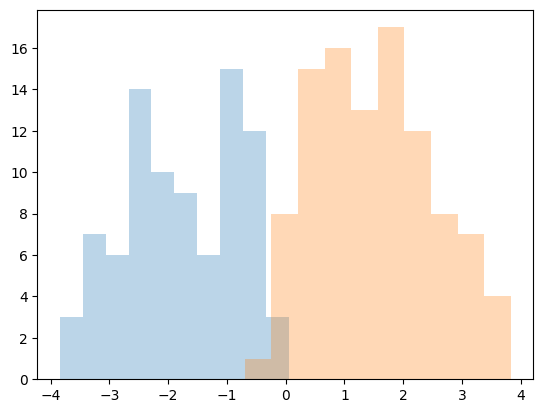

In [47]:
n=len(np.unique(y_Train_array))
for i in range(0,n):
    plt.hist(X_Train_array_t[y_Train_array==i,0],10, alpha=0.3)

(array([ 3.,  7.,  6., 14., 10.,  9.,  6., 15., 12.,  3.]),
 array([-3.84123734, -3.45220436, -3.06317139, -2.67413841, -2.28510544,
        -1.89607246, -1.50703949, -1.11800651, -0.72897354, -0.33994057,
         0.04909241]),
 <BarContainer object of 10 artists>)

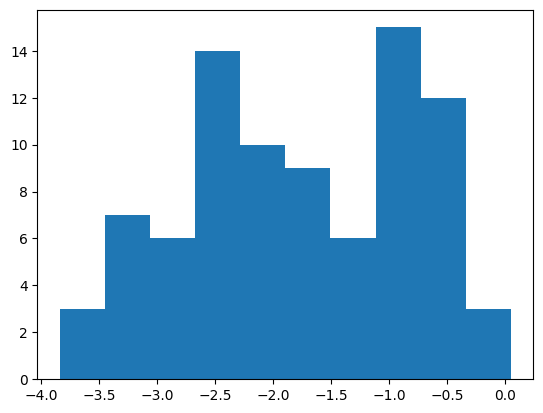

In [49]:
plt.hist(X_Train_array_t[y_Train_array==0,0],10)

(array([ 1.,  8., 15., 16., 13., 17., 12.,  8.,  7.,  4.]),
 array([-0.69921704, -0.24601462,  0.2071878 ,  0.66039022,  1.11359264,
         1.56679506,  2.01999749,  2.47319991,  2.92640233,  3.37960475,
         3.83280717]),
 <BarContainer object of 10 artists>)

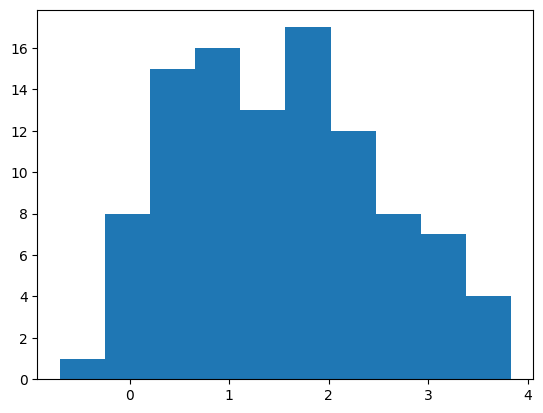

In [50]:
plt.hist(X_Train_array_t[y_Train_array==1,0],10)

In [51]:
lda.xbar_

array([-0.03952232,  0.01623599,  0.02172848,  0.03641433,  0.02665831,
       -0.05826925, -0.07492894])

In [52]:
lda.means_

array([[-0.05415275,  0.05919548,  0.06112092,  0.13142171,  0.09939758,
         0.44658971,  0.85678295],
       [-0.02720957, -0.01991804, -0.01142357, -0.04354237, -0.03455792,
        -0.48315056, -0.8590429 ]])

### Eigenvalues, Canonical correlation, Wiks stats and Chi-sq calculation

In [53]:
np.set_printoptions(precision=3)

In [ ]:
cl_number = labeled_df_scaled['label'].nunique()
X=np.array(X_Train_array)
]
